In [890]:
#initiate imports

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime,timezone
import json
import math

In [53]:
#api for nomics https://api.nomics.com/
apk="m_9386cac54693578a1cbfb3729a22c0c080769888"

In [525]:
#add one second to time for next request so that I can aggregate charts
def updatetime ():

    new_hour=0
    new_minute=0
    new_second=0


    if (last_second<59):
        new_second=last_second+1
        new_hour=last_hour
        new_minute=last_minute
    else:#second flips to 00
        new_second=0
        if (last_minute<59):
            new_minute=last_minute+1 
            new_hour=last_hour
        else:#minute flips to 00
            new_minute=0
            if (last_hour<23):
                new_hour=last_hour+1 
            else:
                new_hour=0

    #converts back to string ex: '09' 
    if (new_second<10):
         new_second='0'+str(new_second)
    else:
        str(new_second)

    if (new_minute<10):
         new_minute='0'+str(new_minute)
    else:
        str(new_minute)

    if (new_hour<10):
         new_hour='0'+str(new_hour)
    else:
        str(new_hour)
        
    
    return f'T{new_hour}%3A{new_minute}%3A{new_second}Z'

In [587]:
#exchange history
def new_request():
    url = f'https://api.nomics.com/v1/trades?key={apk}&exchange=binance&market={crypto}USDT&limit={my_limit}&order=asc&from={start_date}{start_time}'
    return requests.get(url).json()

In [631]:
#build data frame for expressed time and crypto
#UCT time is 8 hours ahead, so this would be 02:00:00am PST
request_num=2

crypto='KMD'
start_time='T04%3A00%3A00Z'
start_date='2021-12-06'
end_day=7 #utc day (for now only works if in the same month!!)
end_hour=20 #utc
my_limit=2500
my_df_lenght=my_limit

#the initial request
df=pd.DataFrame(new_request())
print(f'request: {1}')


#loop while conditions are true
my_conditions=True
my_limit=len(df)


while my_conditions:
    last_time=df.iloc[-1:].timestamp
    last_hour=int(last_time.str.split('T')[my_df_lenght-1][1].split(':')[0])
    last_minute=int(last_time.str.split('T')[my_df_lenght-1][1].split(':')[1])
    last_second=int(last_time.str.split('T')[my_df_lenght-1][1].split(':')[2].split('.')[0])
    last_day=int(df.iloc[-1:].timestamp[my_df_lenght-1].split('T')[0].split('-')[2])
    start_time=updatetime()
    
    if (last_day<end_day):
        my_conditions=True
        if (last_hour<end_hour):
            my_conditions=True
        else:
            my_conditions=False
            print("FALSEEEEE")         
    else:
        my_conditions=False
        print("FALSEEEEE")
            
    if (my_conditions):
        new_df=pd.DataFrame(new_request())
        df=pd.concat([df, new_df])
        df.reset_index(inplace=True)
        del df['index']
        my_df_lenght=len(df)
        print(f'request: {request_num} and new df lenght is {my_df_lenght}')
        request_num=request_num+1
        
df.head()
  

request: 1
request: 2 and new df lenght is 5000
request: 3 and new df lenght is 7500
request: 4 and new df lenght is 10000
request: 5 and new df lenght is 12500
request: 6 and new df lenght is 15000
request: 7 and new df lenght is 17500
request: 8 and new df lenght is 20000
request: 9 and new df lenght is 22500
FALSEEEEE


,id,timestamp,price,volume
0,5492358,2021-12-06T04:04:00.372Z,0.84000000,272.00000000
1,5492359,2021-12-06T04:04:00.372Z,0.83780000,70.00000000
2,5492360,2021-12-06T04:04:00.372Z,0.83770000,36.00000000
3,5492361,2021-12-06T04:04:00.398Z,0.84170000,3.00000000
4,5492362,2021-12-06T04:04:02.153Z,0.84130000,44.00000000


In [633]:
#see built df
#df.timestamp=pd.to_datetime(df['timestamp'])
df

,id,timestamp,price,volume
0,5492358,2021-12-06T04:04:00.372Z,0.84000000,272.00000000
1,5492359,2021-12-06T04:04:00.372Z,0.83780000,70.00000000
2,5492360,2021-12-06T04:04:00.372Z,0.83770000,36.00000000
3,5492361,2021-12-06T04:04:00.398Z,0.84170000,3.00000000
4,5492362,2021-12-06T04:04:02.153Z,0.84130000,44.00000000
...,...,...,...,...
22495,5514926,2021-12-06T22:10:54.308Z,0.88560000,56.00000000
22496,5514927,2021-12-06T22:11:09.086Z,0.88590000,133.00000000
22497,5514928,2021-12-06T22:11:09.095Z,0.88590000,1082.00000000
22498,5514929,2021-12-06T22:11:24.052Z,0.88610000,112.00000000


In [634]:
#change price to a float
df['price']=df['price'].astype(float)

In [635]:
df.reset_index(inplace=True)

In [636]:
#converts UTC time zone to Pacific and then to string for chart
#for index, row in df.iterrows():
#    utc_dt =pd.to_datetime(row.timestamp)
#    pst_tz = timezone('US/Pacific')
#    pst_dt = pst_tz.normalize(utc_dt.astimezone(pst_tz))
#    df.timestamp[index]=pd.to_datetime(pst_dt)

#df.timestamp=df.timestamp.astype(str)
#df

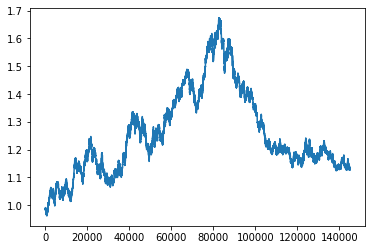

In [658]:
#plot
plt.plot(df.price)
plt.savefig('dec2kmd_spike.png')

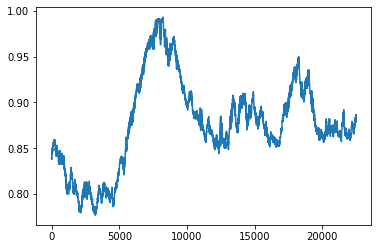

In [650]:
#plot
plt.plot(df.price)
plt.savefig('dec6kmd_spike.png')

In [638]:
#save the csv
#df.to_csv('dec_6_spike_kmd.csv')

In [715]:
df=pd.read_csv('dec_2_spike_kmd.csv')
#can upload this: 'dec_2_spike_kmd.csv'
#test bot
hold=0#default
buy_price=0 #default
old_price=1.2 #when to buy
sell_price=0 #default
new_high=0 #default
original_spend=5000
spend=original_spend #how much to invest
for i, j in df.iterrows():

    if (j.price>old_price and hold==0):
        buy_price=j.price
        new_high=buy_price
        print(f'num={i}')
        print(j.timestamp)
        hold=1
    if (j.price>new_high):
        new_high=j.price
    if (hold==1 and j.price<=new_high*.96 and j.price>buy_price*1.1):#makes sure there isn't a loss for the sell
        sell_price=j.price
        print(f'num={i}')
        print(j.timestamp)
        hold=2
        
    if (hold==2 and j.price>=new_high*1):
        spend=spend+((sell_price/buy_price)*(spend*.98)-spend)
        buy_price=j.price
        new_high=buy_price
        #I will rebuy here with total .... {(sell_price/buy_price)*(spend*.98)-spend}
        hold=1 
        print(f'num={i}')
        print(j.timestamp)
            
print (buy_price)
print (sell_price)
print (f'You made ${(sell_price/buy_price)*(spend*.98)+spend-original_spend*2}')

#maybe not reinvest all option so if It hits 500 keeps 250 for a guaranteed profit?
#and when it hits check to see if there recent twitter post counts?
#time limit or too low?
#perhaps check to see trend and if it jumps by a percentage even if it isn't a new high? 10%?  track new low after new high and if suddenly it jumps up even if it isn't at new high buy again?
#check predictions? in the api

num=20614
2021-12-02T15:56:40.809Z
num=68625
2021-12-02T17:58:18.47Z
num=76033
2021-12-02T18:01:44.625Z
1.4888
1.4287
You made $1317.4185090772808


In [716]:

df=pd.read_csv('dec_6_spike_kmd.csv')
#test bot
hold=0#default
buy_price=0 #default
old_price=.86 #when to buy
sell_price=0 #default
new_high=0 #default
original_spend=5000
spend=original_spend #how much to invest
for i, j in df.iterrows():

    if (j.price>old_price and hold==0):
        buy_price=j.price
        new_high=buy_price
        print(f'num={i}')
        print(j.timestamp)
        hold=1
    if (j.price>new_high):
        new_high=j.price
    if (hold==1 and j.price<=new_high*.96 and j.price>buy_price*1.1):#makes sure there isn't a loss for the sell
        sell_price=j.price
        print(f'num={i}')
        print(j.timestamp)
        hold=2
        
    if (hold==2 and j.price>=new_high*1):
        spend=spend+((sell_price/buy_price)*(spend*.98)-spend)
        buy_price=j.price
        new_high=buy_price
        #I will rebuy here with total .... {(sell_price/buy_price)*(spend*.98)-spend}
        hold=1 
        print(f'num={i}')
        print(j.timestamp)
            
print (buy_price)
print (sell_price)
print (f'You made ${(sell_price/buy_price)*(spend*.98)+spend-original_spend*2}')

num=5500
2021-12-06T16:03:52.921Z
num=8457
2021-12-06T16:07:45.348Z
0.8603
0.9531
You made $428.5598047192834


In [ ]:
################## MY MILLIONAIRE BOT #######################

In [718]:
import cbpro

In [737]:
#get available products
pc=cbpro.PublicClient()
results=pc.get_products()
for row in results:
    print(row['id'])

CHZ-USD
PAX-USD
FIL-USD
REN-BTC
PERP-USD
ETH-USDC
NKN-USD
BAT-BTC
CRV-BTC
CTSI-USD
CVC-USDC
FX-USD
STORJ-BTC
ZEC-USD
ZRX-USD
DASH-BTC
AXS-BTC
MASK-USDT
UST-EUR
MASK-USD
LCX-USDT
VGX-USD
MIR-BTC
ADA-EUR
DOGE-USDT
CVC-USD
NU-USD
RAD-USD
BAND-EUR
WLUNA-GBP
ENJ-BTC
LTC-USD
SNX-EUR
NU-GBP
KRL-USDT
NMR-EUR
OMG-EUR
TRAC-USD
NMR-USD
ZRX-EUR
REN-USD
POLY-USD
GTC-USD
YFI-BTC
ALCX-USDT
ETC-BTC
MCO2-USDT
RLY-GBP
LCX-EUR
GRT-USD
UST-USDT
ETH-USDT
CRV-EUR
UMA-EUR
XLM-USD
BCH-BTC
CLV-GBP
ALCX-EUR
SNX-GBP
NMR-BTC
EOS-EUR
XYO-USDT
IOTX-USDT
MANA-ETH
UMA-BTC
TRIBE-USD
DOGE-USD
RAD-GBP
KRL-EUR
OMG-GBP
TRU-USDT
AXS-USD
ETH-BTC
DASH-USD
BTRST-USDT
FIL-EUR
POWR-USDT
RGT-USD
FET-USD
MANA-USDC
LOOM-USDC
ARPA-EUR
FORTH-EUR
STORJ-USD
1INCH-BTC
BAT-EUR
MLN-USD
MIR-GBP
ASM-USD
UNI-USD
BAT-USDC
CRO-EUR
DOGE-GBP
WCFG-GBP
REP-USD
BICO-USD
FOX-USDT
BNT-USD
SOL-GBP
FARM-USDT
MANA-USD
KNC-USD
ZEN-BTC
ETC-USD
AXS-EUR
ENS-USD
ICP-BTC
DDX-USDT
MATIC-USD
IDEX-USD
BTC-USDC
UNI-GBP
ARPA-USD
CGLD-BTC
CHZ-EUR
RAD-EUR
CGLD-GBP


In [833]:
#get my coinbase psscodes
myps=open('../phrase.txt','r').read().splitlines()
public = myps[2].split(':')[1]
passphrase = myps[0].split(':')[1]
secret = myps[1].split(':')[1]

In [834]:
#create my client
auth_client = cbpro.AuthenticatedClient(public,secret,passphrase)

In [850]:
#verify my client
auth_client.get_accounts()

[{'id': '6816884e-323c-4bbe-a17d-19f983531c08',
  'currency': '1INCH',
  'balance': '0.0000000000000000',
  'hold': '0.0000000000000000',
  'available': '0',
  'profile_id': 'e4ceef7d-bf47-4805-9db1-a65dacc3eb24',
  'trading_enabled': True},
 {'id': 'a6c04dbc-7d9d-47ad-9e00-2496e9c83d55',
  'currency': 'AAVE',
  'balance': '0.0000000000000000',
  'hold': '0.0000000000000000',
  'available': '0',
  'profile_id': 'e4ceef7d-bf47-4805-9db1-a65dacc3eb24',
  'trading_enabled': True},
 {'id': 'fd3a3da9-f798-4d37-9a24-95b0e85765a5',
  'currency': 'ACH',
  'balance': '0.0000000000000000',
  'hold': '0.0000000000000000',
  'available': '0',
  'profile_id': 'e4ceef7d-bf47-4805-9db1-a65dacc3eb24',
  'trading_enabled': True},
 {'id': '12e1a26d-c4b6-4de5-a58e-ca617e550262',
  'currency': 'ADA',
  'balance': '0.0000000000000000',
  'hold': '0.0000000000000000',
  'available': '0',
  'profile_id': 'e4ceef7d-bf47-4805-9db1-a65dacc3eb24',
  'trading_enabled': True},
 {'id': '980f54ed-c254-4359-84d1-769f

In [ ]:
#function to get floor down to two decimal places
def floor_balance(value):
    return math.floor(value*100)/100

In [778]:
#ticker for crypto
def ticker_update(my_ticker):
    import requests

    url = "https://api.exchange.coinbase.com/products/"+my_ticker+"-USD/ticker"

    headers = {"Accept": "application/json"}

    response = requests.request("GET", url, headers=headers)

    return response

In [1039]:
#gets available balance for sell or buy
def get_balance(curr):
    for account in accounts:
        currency=account.get('currency')
        if currency==curr:
            acc_id=account.get('id')
            print(curr)
            print(auth_client.get_account(acc_id))
    return auth_client.get_account(acc_id)['available']

In [1018]:
#MILLIONAIR BOT
count=0
hold=0#default
buy_price=0 #default
old_price=14.09 #when to buy
sell_price=0 #default
new_high=0 #default
original_spend=float(get_balance('USDT'))
spend=math.floor(original_spend) #how much to invest
print(f'original spend: {spend}')
type_crypto='MASK'
type_exchange=type_crypto+'-USDT'


while True:#currently this keeps running until manually exiting
    time.sleep(10)
    count=count+1
    price=float(ticker_update(type_crypto).json()['price'])
    if (count==30):
        print (price)
        count=0
    #print(f'current price ${price}')
    if (price>old_price and hold==0):
        buy_price=price
        new_high=buy_price
        print('initial buy')
        print(datetime.now())
        print(f'buy price: {buy_price}')
        print(auth_client.place_market_order(type_exchange, 'buy', funds=spend))
        hold=1
    if (price>new_high):
        new_high=price
        print(f'new_high: {new_high}')
    if (hold==1 and price<=new_high*.96 and price>buy_price*1.01):#makes sure there isn't a loss for the sell
        sell_price=price
        print('sold')
        print(datetime.now())
        print(f'sell price: {sell_price}')
        print(auth_client.place_market_order(type_exchange, 'sell', size=floor_balance(float(get_balance(type_crypto)))))
        hold=2
        
    if (hold==2 and price>=new_high*1):
        spend=math.floor(float(get_balance('USDT'))) #this will need to look at money transfered but for now i'll do this
        print(f'original spend: {spend}')
        buy_price=price
        new_high=buy_price
        #I will rebuy here with total .... {(sell_price/buy_price)*(spend*.98)-spend}
        hold=1 
        print(f'rebuy price: {buy_price}')
        print(datetime.now())
        print(auth_client.place_market_order(type_exchange, 'buy', funds=spend))
            
print (buy_price)
print (sell_price)
print (f'You made ${(sell_price/buy_price)*(spend*.98)+spend-original_spend*2}')

sold
2021-12-09 08:03:43.579167
sell price: 13.01
MASK
{'message': 'funds is too small. Minimum size is 1.00000000'}


KeyboardInterrupt: 

In [1047]:
#manually sell my current one
print(auth_client.place_market_order(type_exchange, 'sell', size=floor_balance(float(get_balance(type_crypto)))))

MASK
{'id': 'f8765463-bde3-4c7c-8c92-4484ba10d156', 'currency': 'MASK', 'balance': '2.6100000000000000', 'hold': '0.0000000000000000', 'available': '2.61', 'profile_id': 'e4ceef7d-bf47-4805-9db1-a65dacc3eb24', 'trading_enabled': True}
{'id': '25a4f926-0a40-4021-9ed8-ef21993b1e9b', 'size': '2.61', 'product_id': 'MASK-USDT', 'side': 'sell', 'stp': 'dc', 'type': 'market', 'post_only': False, 'created_at': '2021-12-09T16:25:14.505944Z', 'fill_fees': '0', 'filled_size': '0', 'executed_value': '0', 'status': 'pending', 'settled': False}


In [823]:
#manually calculate earning
f'You made ${(23.11/buy_price)*(spend)+spend-original_spend*2}'

'You made $62.838469304231694'

In [857]:
#manually buy
auth_client.place_market_order('BTC-USDT', 'buy', funds=5)

{'id': '2b89d592-6411-45d2-a397-6bc07c39985b',
 'product_id': 'BTC-USDT',
 'side': 'buy',
 'stp': 'dc',
 'funds': '4.97512437',
 'specified_funds': '5',
 'type': 'market',
 'post_only': False,
 'created_at': '2021-12-08T21:50:28.975657Z',
 'fill_fees': '0',
 'filled_size': '0',
 'executed_value': '0',
 'status': 'pending',
 'settled': False}

In [858]:
#manually sell 
auth_client.place_market_order('BTC-USDT', 'sell', funds=10)

{'id': '4c5ba478-6384-4c12-bf25-9e64d022b424',
 'product_id': 'BTC-USDT',
 'side': 'sell',
 'stp': 'dc',
 'funds': '10',
 'specified_funds': '10',
 'type': 'market',
 'post_only': False,
 'created_at': '2021-12-08T21:50:31.727489Z',
 'fill_fees': '0',
 'filled_size': '0',
 'executed_value': '0',
 'status': 'pending',
 'settled': False}